# 옵티마이저에 따른 모델 학습 결과 비교

- 세 가지 다른 옵티마이저(SGD, Adam, RMSprop)를 사용하여 동일한 모델을 학습시키고,
- 각 옵티마이저의 성능을 비교합니다.

## 1. 데이터 로드 및 전처리

- 필요한 라이브러리를 임포트하고, 와인 데이터셋을 로드하여 특성(X)과 타겟(y)으로 분리합니다.
- 타겟을 원-핫 인코딩으로 변환하여 분류 문제에 적합하게 만듭니다.
- 데이터를 학습 세트와 테스트 세트로 분할합니다.
- `StandardScaler`를 사용하여 데이터를 정규화합니다.

In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# 데이터셋 로드
wine = load_wine()
X = wine.data
y = wine.target

# 타겟을 원-핫 인코딩으로 변환
y = tf.keras.utils.to_categorical(y)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (평균 0, 표준편차 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2. 모델 정의 함수

- 입력층, 은닉층 2개, 드롭아웃 층, 출력층으로 구성된 모델을 생성

In [2]:
# 모델 정의 함수
def create_model():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(y_train.shape[1], activation='softmax')
    ])
    return model

# 3. 옵티마이저 설정 및 학습

- **옵티마이저 리스트 정의**: SGD, Adam, RMSprop 옵티마이저를 사용
- **모델 컴파일 및 학습**: 각 옵티마이저로 모델을 컴파일하고 학습시
- **학습 결과 저장**: 각 옵티마이저로 학습한 결과를 `histories` 딕셔너리에 저장
- **모델 평가**: 각 모델의 테스트 성능을 평가하여 출력

In [3]:
# 옵티마이저 리스트 정의
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Adam': tf.keras.optimizers.Adam(),
    'RMSprop': tf.keras.optimizers.RMSprop()
}

# 학습 결과를 저장할 딕셔너리
histories = {}

# 각 옵티마이저로 모델 학습 및 평가
for opt_name, opt in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer:")
    model = create_model()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    histories[opt_name] = history

    # 모델 평가
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{opt_name} optimizer - Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


Training with SGD optimizer:
SGD optimizer - Test loss: 0.3272, Test accuracy: 0.9722

Training with Adam optimizer:
Adam optimizer - Test loss: 0.0149, Test accuracy: 1.0000

Training with RMSprop optimizer:
RMSprop optimizer - Test loss: 0.0009, Test accuracy: 1.0000


# 4. 학습 결과 시각화

- 각 옵티마이저에 대한 학습 및 검증 손실과 정확도를 시각화하여 비교

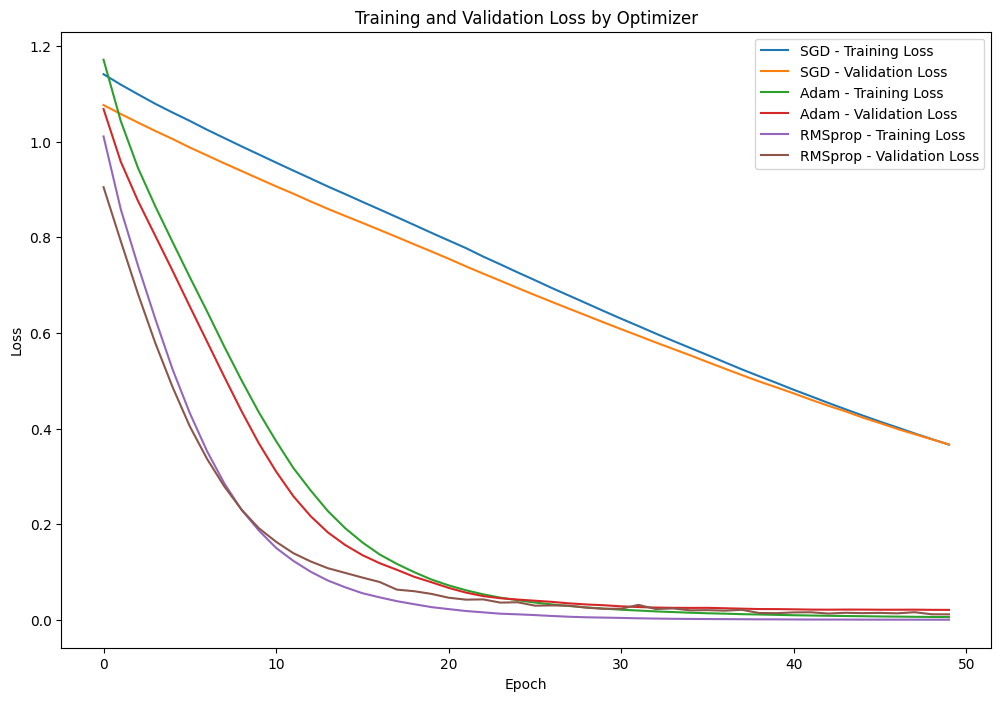

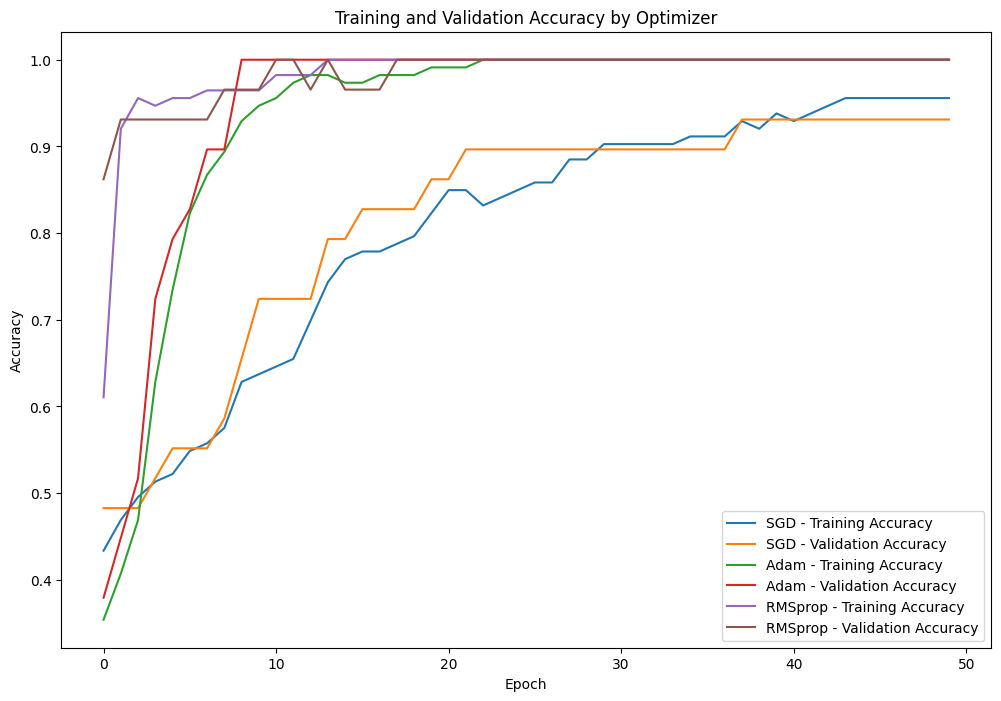

In [4]:
# 학습 및 검증 손실 시각화
plt.figure(figsize=(12, 8))
for opt_name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{opt_name} - Training Loss')
    plt.plot(history.history['val_loss'], label=f'{opt_name} - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss by Optimizer')
plt.legend()
plt.show()

# 학습 및 검증 정확도 시각화
plt.figure(figsize=(12, 8))
for opt_name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{opt_name} - Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{opt_name} - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Optimizer')
plt.legend()
plt.show()